In [1]:
import requests as req

In [2]:
res = req.get('http://naver.com')
res

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
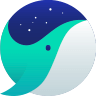
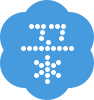

In [3]:
res.text

In [4]:
#서버를 찾을 수 없음-클라이언트 에러
res2 = req.get('https://www.melon.com/')
res2

<Response [406]>

In [5]:
#위의 문제를 해결하기 위해 header 지정?
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36 Edg/105.0.1343.33'}

In [6]:
res2 = req.get('https://www.melon.com/', headers=header)
res2

<Response [200]>

In [8]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=34a4750a88cd108ce9514ea4e6ef9e2aedf48ba6b555b63f141ea551eacb24dd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [9]:
from bs4 import BeautifulSoup as bs

#객체화
soup = bs(res.text, "html.parser")

soup.select("tag_name")
soup

soup.select("tag_name.class_name")

#특정태그1
soup.select('tag > child_tag')

#특정태그2
soup.select('tag.class_name > child_tag')

In [19]:
res3 = req.get('http://naver.com')
res3

<Response [200]>


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
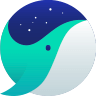
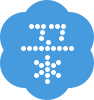

In [20]:
#객체화
soup = bs(res3.text, 'html.parser')
soup

In [21]:
naver = soup.select("a.nav")
naver

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [22]:
len(naver)

16

In [23]:
#메일이라는 컨텐츠만 뽑아오고 싶을 때!
#네이버 타입: 리스트
#인덱싱을 통해 하나의 스트링만 선택
naver[0].text

'메일'

In [24]:
naver[1].text

'카페'

In [26]:
#for문을 이용하여 모든 컨텐츠 출력해보기!
for i in naver:
    print(i.text)


메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


In [47]:
#네이버 코스피, 거래상위
re4=req.get('https://finance.naver.com/sise/sise_quant.naver')
re4

<Response [200]>

In [48]:
soup2 = bs(re4.text, 'html.parser')
soup2


<!--  global include -->
<html lang="ko">
<head>
<title>거래상위 종목 : 네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="http://finance.naver.com/sise/sise_quant.naver" property="og:url">
<meta content="거래상위 종목 : 네이버 금융" property="og:title">
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220907184351/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.p

In [84]:
title = soup2.select("a.tltle")
title

[<a class="tltle" href="/item/main.naver?code=252670">KODEX 200선물인버스2X</a>,
 <a class="tltle" href="/item/main.naver?code=530036">삼성 인버스 2X WTI원유 선물 ETN</a>,
 <a class="tltle" href="/item/main.naver?code=251340">KODEX 코스닥150선물인버스</a>,
 <a class="tltle" href="/item/main.naver?code=122630">KODEX 레버리지</a>,
 <a class="tltle" href="/item/main.naver?code=114800">KODEX 인버스</a>,
 <a class="tltle" href="/item/main.naver?code=005930">삼성전자</a>,
 <a class="tltle" href="/item/main.naver?code=233740">KODEX 코스닥150레버리지</a>,
 <a class="tltle" href="/item/main.naver?code=500054">신한 인버스 2X 천연가스 선물 ETN</a>,
 <a class="tltle" href="/item/main.naver?code=091090">세원이앤씨</a>,
 <a class="tltle" href="/item/main.naver?code=500032">신한 인버스 2X 천연가스 선물 ETN(H)</a>,
 <a class="tltle" href="/item/main.naver?code=001570">금양</a>,
 <a class="tltle" href="/item/main.naver?code=003580">HLB글로벌</a>,
 <a class="tltle" href="/item/main.naver?code=064350">현대로템</a>,
 <a class="tltle" href="/item/main.naver?code=010580">에스엠벡셀</a>,

In [85]:
len(title)

100

In [86]:
for i in title:
    print(i.text)

KODEX 200선물인버스2X
삼성 인버스 2X WTI원유 선물 ETN
KODEX 코스닥150선물인버스
KODEX 레버리지
KODEX 인버스
삼성전자
KODEX 코스닥150레버리지
신한 인버스 2X 천연가스 선물 ETN
세원이앤씨
신한 인버스 2X 천연가스 선물 ETN(H)
금양
HLB글로벌
현대로템
에스엠벡셀
대한전선
신한 인버스 2X WTI원유 선물 ETN(H)
신성이엔지
대원화성
한화솔루션
팬오션
한국항공우주
TRUE 인버스 2X 천연가스 선물 ETN(H)
동국제강
조일알미늄
두산에너빌리티
코스모화학
동양
한화에어로스페이스
HMM
쌍방울
삼성 레버리지 WTI원유 선물 ETN
QV 인버스 레버리지 WTI원유 선물 ETN(H)
KODEX 200
TIGER 원유선물인버스(H)
TIGER 200선물인버스2X
이스타코
현대제철
KEC
이수화학
SK하이닉스
혜인
TIGER 차이나전기차SOLACTIVE
삼성중공업
KODEX 2차전지산업
한화생명
우리금융지주
수산중공업
KODEX WTI원유선물인버스(H)
카카오뱅크
베트남개발1
KODEX 코스닥150
다스코
KG스틸
카카오
KODEX 미국나스닥100레버리지(합성 H)
한미글로벌
후성
현대두산인프라코어
신한 레버리지 WTI원유 선물 ETN(H)
삼부토건
진원생명과학
TIGER 단기통안채
GS글로벌
에이프로젠
휴스틸
대우건설
대한항공
하나금융지주
SH에너지화학
하이스틸
대한해운
제이알글로벌리츠
KB금융
기아
TYM
신원
TIGER 인버스
포스코케미칼
미래아이앤지
도화엔지니어링
사조동아원
미래에셋증권
KODEX 은선물(H)
KODEX 미국달러선물인버스2X
제주은행
신한지주
TIGER 미국S&P500
동양철관
TRUE 인버스 2X 나스닥 100 ETN
TIGER KRX2차전지K-뉴딜
BNK금융지주
서울식품
한창
한솔홈데코
삼성엔지니어링
콘텐트리중앙
조광페인트
HSD엔진
명신산업
TIGER 미국필라델피아반도체나스닥


In [87]:
#리스트?
title_list=[]
for i in title:
    title_list.append(i.text)
title_list

['KODEX 200선물인버스2X',
 '삼성 인버스 2X WTI원유 선물 ETN',
 'KODEX 코스닥150선물인버스',
 'KODEX 레버리지',
 'KODEX 인버스',
 '삼성전자',
 'KODEX 코스닥150레버리지',
 '신한 인버스 2X 천연가스 선물 ETN',
 '세원이앤씨',
 '신한 인버스 2X 천연가스 선물 ETN(H)',
 '금양',
 'HLB글로벌',
 '현대로템',
 '에스엠벡셀',
 '대한전선',
 '신한 인버스 2X WTI원유 선물 ETN(H)',
 '신성이엔지',
 '대원화성',
 '한화솔루션',
 '팬오션',
 '한국항공우주',
 'TRUE 인버스 2X 천연가스 선물 ETN(H)',
 '동국제강',
 '조일알미늄',
 '두산에너빌리티',
 '코스모화학',
 '동양',
 '한화에어로스페이스',
 'HMM',
 '쌍방울',
 '삼성 레버리지 WTI원유 선물 ETN',
 'QV 인버스 레버리지 WTI원유 선물 ETN(H)',
 'KODEX 200',
 'TIGER 원유선물인버스(H)',
 'TIGER 200선물인버스2X',
 '이스타코',
 '현대제철',
 'KEC',
 '이수화학',
 'SK하이닉스',
 '혜인',
 'TIGER 차이나전기차SOLACTIVE',
 '삼성중공업',
 'KODEX 2차전지산업',
 '한화생명',
 '우리금융지주',
 '수산중공업',
 'KODEX WTI원유선물인버스(H)',
 '카카오뱅크',
 '베트남개발1',
 'KODEX 코스닥150',
 '다스코',
 'KG스틸',
 '카카오',
 'KODEX 미국나스닥100레버리지(합성 H)',
 '한미글로벌',
 '후성',
 '현대두산인프라코어',
 '신한 레버리지 WTI원유 선물 ETN(H)',
 '삼부토건',
 '진원생명과학',
 'TIGER 단기통안채',
 'GS글로벌',
 '에이프로젠',
 '휴스틸',
 '대우건설',
 '대한항공',
 '하나금융지주',
 'SH에너지화학',
 '하이스틸',
 '대한해운',
 '제이알글로벌리츠',
 'KB금융',
 '기아

In [60]:
#현재가
price = soup2.select("td.number")
price

[<td class="number">3,085</td>,
 <td class="number">
 <img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
 				170
 				</span>
 </td>,
 <td class="number">
 <span class="tah p11 nv01">
 				-5.22%
 				</span>
 </td>,
 <td class="number">100,458,448</td>,
 <td class="number">312,179</td>,
 <td class="number">3,075</td>,
 <td class="number">3,080</td>,
 <td class="number">20,703</td>,
 <td class="number">N/A</td>,
 <td class="number">N/A</td>,
 <td class="number">145</td>,
 <td class="number">
 <img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
 				10
 				</span>
 </td>,
 <td class="number">
 <span class="tah p11 nv01">
 				-6.45%
 				</span>
 </td>,
 <td class="number">24,630,412</td>,
 <td class="number">3,451</td>,
 <td class="number">140</td>,
 <td class="number">145</td

In [61]:
len(price)

1000

In [73]:
price_raw_list = []
for i in price:
    price_raw_list.append(i.text)
price_raw_list

['3,085',
 '\n\n\t\t\t\t170\n\t\t\t\t\n',
 '\n\n\t\t\t\t-5.22%\n\t\t\t\t\n',
 '100,458,448',
 '312,179',
 '3,075',
 '3,080',
 '20,703',
 'N/A',
 'N/A',
 '145',
 '\n\n\t\t\t\t10\n\t\t\t\t\n',
 '\n\n\t\t\t\t-6.45%\n\t\t\t\t\n',
 '24,630,412',
 '3,451',
 '140',
 '145',
 '2,171',
 'N/A',
 'N/A',
 '4,835',
 '\n\n\t\t\t\t145\n\t\t\t\t\n',
 '\n\n\t\t\t\t-2.91%\n\t\t\t\t\n',
 '15,963,257',
 '77,346',
 '4,830',
 '4,835',
 '4,646',
 'N/A',
 'N/A',
 '15,040',
 '\n\n\t\t\t\t760\n\t\t\t\t\n',
 '\n\n\t\t\t\t+5.32%\n\t\t\t\t\n',
 '14,885,649',
 '222,269',
 '15,050',
 '15,055',
 '21,650',
 'N/A',
 'N/A',
 '4,855',
 '\n\n\t\t\t\t130\n\t\t\t\t\n',
 '\n\n\t\t\t\t-2.61%\n\t\t\t\t\n',
 '13,093,530',
 '63,827',
 '4,850',
 '4,855',
 '8,632',
 'N/A',
 'N/A',
 '57,800',
 '\n\n\t\t\t\t2,200\n\t\t\t\t\n',
 '\n\n\t\t\t\t+3.96%\n\t\t\t\t\n',
 '9,850,181',
 '565,754',
 '57,800',
 '57,900',
 '3,450,534',
 '8.77',
 '13.92',
 '8,865',
 '\n\n\t\t\t\t505\n\t\t\t\t\n',
 '\n\n\t\t\t\t+6.04%\n\t\t\t\t\n',
 '8,963,287',
 '7

In [94]:
#진행상황을 확인해주는 라이브러리 -> for문만 가능, while문은 사용불가능
from tqdm import tqdm_notebook
#from tqdm import tqdm_notebook as tqdm

In [95]:
#i = 인덱싱이용하여 현재가만 출력하기 위해서 10으로 나눠줘야함 
#현재가~ROE가 10개의 컬럼이기 때문에 현재가.col만 추출하기 위해서
price_list=[]
#for i in tqdm(range(0, 1000)):
for i in tqdm_notebook(range(0, 1000)):
    if i % 10 == 0 :
        price = price_raw_list[i]
        price_list.append(price)
price_list

C:\Users\user\AppData\Local\Temp\ipykernel_15244\2037268993.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, 1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

['3,085',
 '145',
 '4,835',
 '15,040',
 '4,855',
 '57,800',
 '8,865',
 '165',
 '792',
 '95',
 '16,750',
 '10,050',
 '28,050',
 '2,775',
 '1,685',
 '125',
 '2,420',
 '3,005',
 '52,400',
 '5,130',
 '53,000',
 '295',
 '14,400',
 '2,295',
 '17,950',
 '28,250',
 '1,130',
 '77,000',
 '21,050',
 '484',
 '1,825',
 '115',
 '31,765',
 '3,260',
 '3,230',
 '1,220',
 '36,000',
 '2,800',
 '30,550',
 '93,700',
 '7,220',
 '14,925',
 '5,700',
 '20,395',
 '2,485',
 '11,700',
 '2,990',
 '4,685',
 '26,300',
 '71',
 '11,340',
 '6,180',
 '10,550',
 '69,400',
 '5,525',
 '23,000',
 '16,250',
 '5,410',
 '1,265',
 '1,905',
 '10,850',
 '101,275',
 '3,420',
 '1,295',
 '8,450',
 '5,010',
 '26,250',
 '38,650',
 '1,135',
 '4,320',
 '2,210',
 '4,830',
 '50,000',
 '80,500',
 '2,405',
 '1,680',
 '5,415',
 '179,500',
 '283',
 '9,580',
 '1,330',
 '6,740',
 '3,935',
 '6,480',
 '6,780',
 '35,800',
 '14,180',
 '1,125',
 '2,035',
 '14,890',
 '6,660',
 '244',
 '1,030',
 '1,335',
 '22,850',
 '40,800',
 '10,300',
 '8,070',
 '24

In [63]:
price[0].text

'3,085'

In [77]:
#데이터 테이블 = 데이터 프레임 -> 길이가 동일해야함
import pandas as pd

In [88]:
len(price_list), len(title_list)

(100, 100)

In [89]:
data={'종목명' : title_list, '가격정보' : price_list}


In [92]:
kospi = pd.DataFrame(data)
kospi

,종목명,가격정보
0,KODEX 200선물인버스2X,"3,085"
1,삼성 인버스 2X WTI원유 선물 ETN,145
2,KODEX 코스닥150선물인버스,"4,835"
3,KODEX 레버리지,"15,040"
4,KODEX 인버스,"4,855"
...,...,...
95,콘텐트리중앙,"40,800"
96,조광페인트,"10,300"
97,HSD엔진,"8,070"
98,명신산업,"24,300"


In [93]:
#파일명.확장자명 저장 
kospi.to_excel('코스피지수.xlsx', encoding='utf-8-sig')